In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [63]:
df=pd.read_csv("/content/bank-full (1).csv",sep=";")

In [64]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [65]:
#EDA

In [66]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [67]:
df.isna().sum()/len(df)*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [68]:

df["default"]=df["default"].replace("yes","1")

In [69]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [70]:
df["default"]=df["default"].replace("no","0")

In [71]:
replacement={"married":"1","single":"0", "divorced":"2"}

In [72]:
df["marital"]=df["marital"].replace(replacement)

In [73]:
replacement2={"primary":"0","secondary":"1","tertiary":"2","unknown":"3"}
replacement3={"yes":"1","no":"0"}
replacement4={"yes":"1","no":"0"}
replacement5={"unknown":"0","cellular":"1","telephone":"2"}
replacement6={"jan":"0","feb":"1","mar":"2","apr":"3","may":"4","jun":"5","jul":"6","aug":"7","sep":"8","oct":"9","nov":"10","dec":"11"}
replacement7={"failure":"0","success":"1","unknown":"2","other":"3"}
replacement8={"no":"0","yes":"1"}
replacement9={"admin.":"0","unknown":"1","unemployed":"2","management":"3","housemaid":"4","entrepreneur":"5","student":"6","blue-collar":"7","self-employed":"8","retired":"9","technician":"10","services":"11"}

In [74]:
df["education"]=df["education"].replace(replacement2)
df["housing"]=df["housing"].replace(replacement3)
df["loan"]=df["loan"].replace(replacement4)
df["contact"]=df["contact"].replace(replacement5)
df["month"]=df["month"].replace(replacement6)
df["poutcome"]=df["poutcome"].replace(replacement7)
df["y"]=df["y"].replace(replacement8)
df["job"]=df["job"].replace(replacement9)

In [75]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,3,1,2,0,2143,1,0,0,5,4,261,1,-1,0,2,0
1,44,10,0,1,0,29,1,0,0,5,4,151,1,-1,0,2,0
2,33,5,1,1,0,2,1,1,0,5,4,76,1,-1,0,2,0
3,47,7,1,3,0,1506,1,0,0,5,4,92,1,-1,0,2,0
4,33,1,0,3,0,1,0,0,0,5,4,198,1,-1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,1,2,0,825,0,0,1,17,10,977,3,-1,0,2,1
45207,71,9,2,0,0,1729,0,0,1,17,10,456,2,-1,0,2,1
45208,72,9,1,1,0,5715,0,0,1,17,10,1127,5,184,3,1,1
45209,57,7,1,1,0,668,0,0,2,17,10,508,4,-1,0,2,0


In [76]:
#independent and dependent variables

In [77]:
x = df.iloc[:,:-1]
y= df.iloc[:,16]

In [78]:
#using logistic regression to fit the model

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
log= LogisticRegression()

In [81]:
y.info

<bound method Series.info of 0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: object>

In [82]:
x.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,3,1,2,0,2143,1,0,0,5,4,261,1,-1,0,2
1,44,10,0,1,0,29,1,0,0,5,4,151,1,-1,0,2
2,33,5,1,1,0,2,1,1,0,5,4,76,1,-1,0,2
3,47,7,1,3,0,1506,1,0,0,5,4,92,1,-1,0,2
4,33,1,0,3,0,1,0,0,0,5,4,198,1,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,10,1,2,0,825,0,0,1,17,10,977,3,-1,0,2
45207,71,9,2,0,0,1729,0,0,1,17,10,456,2,-1,0,2
45208,72,9,1,1,0,5715,0,0,1,17,10,1127,5,184,3,1
45209,57,7,1,1,0,668,0,0,2,17,10,508,4,-1,0,2


In [83]:
log.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
#predict for x dataset
y_pred=log.predict(x)

In [85]:
y_pred_df=pd.DataFrame({"actual":y,"predicted":y_pred})

In [86]:
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [87]:
#Classification report
#f1 score
#accuracy

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.15      0.24      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



In [89]:
log.predict_proba(x)

array([[0.8921348 , 0.1078652 ],
       [0.9462961 , 0.0537039 ],
       [0.8952045 , 0.1047955 ],
       ...,
       [0.72300131, 0.27699869],
       [0.93222331, 0.06777669],
       [0.77149639, 0.22850361]])

In [90]:
#visualization

plt.figure(figsize=(8, 6))
plt.hist(y_pred_df,x=y_pred_df["actual"],y=y_pred_df["predicted"], color='skyblue')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

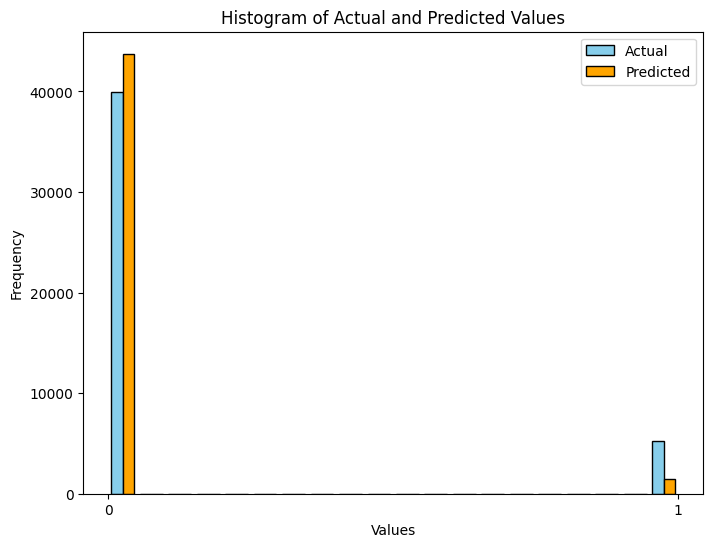

In [91]:
actual = y_pred_df['actual']
predicted = y_pred_df['predicted']

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist([actual, predicted], bins=20, color=['skyblue', 'orange'], edgecolor='black', label=['Actual', 'Predicted'])
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Actual and Predicted Values')
plt.legend()
plt.show()

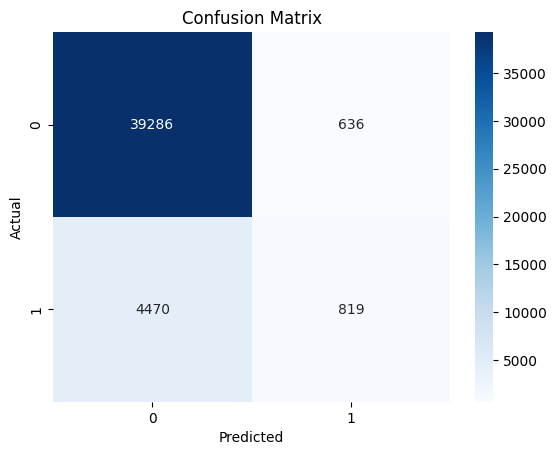

In [92]:
confusion_matrix = pd.crosstab(y_pred_df['actual'], y_pred_df['predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

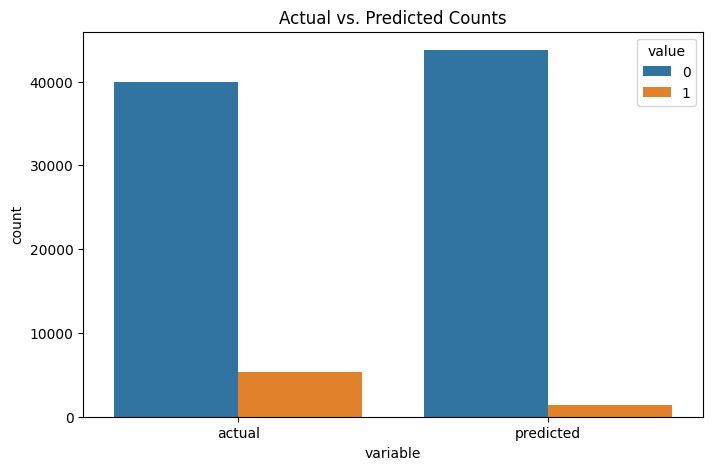

In [93]:
plt.figure(figsize=(8, 5))
sns.countplot(x='variable', hue='value', data=pd.melt(y_pred_df[['actual', 'predicted']]))
plt.title('Actual vs. Predicted Counts')
plt.show()